##### Utilizando os dados de lajeado/RS. Importe os dados. A variável ano_mes ainda não está como estrutura tempora. Transforme-a para formato temporal com a função yearmonth e convirta seu dataset para um dataset em formato de série temporal utilizando as_tsiblle(). Selecione as variáveis ano_mes e temp_max.Ajuste os 4 modelos vistos até agora (MEAN, NAIVE, SNAIVE e drift) Faça a previsão h = 12 passos à frente e faça o gráfico correspondente utilizando autoplot().

In [ ]:
install.packages("fpp3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’, ‘urca’




In [ ]:
library(ggplot2)
library(slider)
library(fpp3)

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/lajeado_rs.csv", sep = ";")
df <- df %>% 
  mutate(ano_mes = yearmonth(ano_mes)) %>% 
  select(ano_mes, temp_media) %>% 
  as_tsibble(index = ano_mes)
glimpse(df)

Rows: 79
Columns: 2
$ ano_mes    <mth> 2015 Jan, 2015 Feb, 2015 Mar, 2015 Apr, 2015 May, 2015 Jun,…
$ temp_media <dbl> 25.6, 24.8, 24.2, 21.2, 18.5, 16.2, 15.9, 21.0, 17.8, 19.4,…


In [ ]:
as_tsibble(df)

ano_mes,temp_media
<mth>,<dbl>
2015 Jan,25.6
2015 Feb,24.8
2015 Mar,24.2
2015 Apr,21.2
2015 May,18.5
2015 Jun,16.2
2015 Jul,15.9
2015 Aug,21.0
2015 Sep,17.8


In [ ]:
fit <- df %>% 
       model(media = MEAN(temp_media),
             naive = NAIVE(temp_media),
             snaive = SNAIVE(temp_media~lag(12)),
             drift = RW(temp_media ~ drift()))

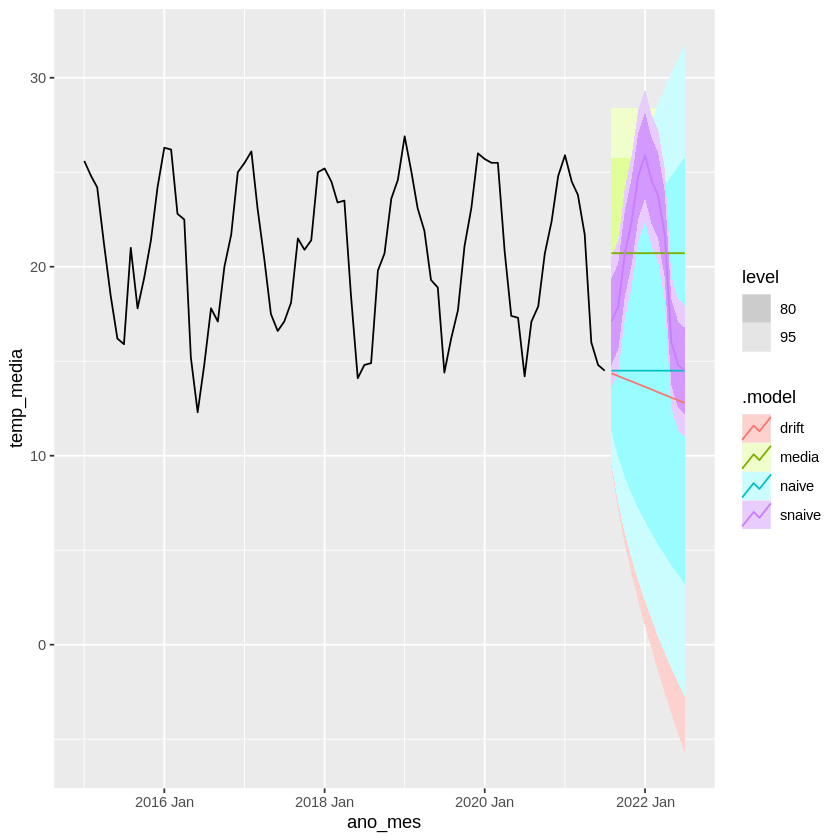

In [ ]:
fit %>% forecast(h = 12) %>% autoplot(df)